Files

unique_types.csv

This file represents the unique museum object types that can be predicted. All types are in Estonian language.

train.csv

Training set that should be used to build your machine learning models. The training set includes both the descriptive variables of the museum object and the ground truth about the type of the object.

test.csv

Test set should be used to see how well your model performs on unseen data. The test set includes the descriptive variables about the objects but not the type of the object. It is your job to predict it using the model you built on the training data!

sample_submission.csv

An example of what the submission file should look like. For every row in the test data, submission files should contain two columns: id (representing the id of the museum object) and type (representing the type of the object). Example format:

id, type

2652198, foto

3851731, kiri

Etc.

Thus, we ask you to help us by creating a smart model to fill in the gaps in the data based on existing descriptive variables. 

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
#Importing Test and Train data 
import pandas as pd

#unique_types = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/unique_types.csv")
#datatest = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/test.csv")
#df = pd.read_csv("/content/drive/MyDrive/ColabNotebooks/train.csv")



datatest = pd.read_csv("/Users/siimpahn/Desktop/caps-in-museums-data-part-2/test.csv" )
df = pd.read_csv("/Users/siimpahn/Desktop/caps-in-museums-data-part-2/train.csv")
unique_types = pd.read_csv("/Users/siimpahn/Desktop/caps-in-museums-data-part-2/unique_types.csv")


In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
df.head()

,id,full_nr,name,ks,material,commentary,event_type,location,start,end,before_Christ,country_and_unit,participants_role,participant,parish,text,class,technique,parameter,unit,value,museum_abbr,musealia_mark,musealia_seria_nr,musealia_queue_nr,musealia_additional_nr,collection_mark,collection_queue_nr,collection_additional_nr,element_count,legend,is_original,initial_info,damages,state,color,additional_text,type
0,232170,ETMM _ 12150:115 Aj 118:44/M20,"Kuno Areng, Bremerhaveni Festwoche medal",118.0,metall,NaN,festivalid,linn Bremerhaven,1979,NaN,ei,Saksamaa,osaleja,"Areng, Kuno",NaN,NaN,NaN,NaN,läbimõõt,cm,4,ETMM,_,12150.0,115.0,NaN,Aj,44.0,M20,1.0,NaN,1.0,Festwoche- Breemenhaven,NaN,hea,hall,KUTTER ASTARTE -SCHIFFERGILDE BREMENHAVEN E. V.,medal
1,2251378,ETMM _ 12584:19 M 102:1/13:13,"Foto-Villem Kapp,foto pühendusega Armilde M,1937",102.0,fotomaterjal,NaN,filmindus ja fotograafia,NaN,1938,NaN,ei,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12584.0,19.0,NaN,M,1.0,13:13,1.0,Fotod Villem Kapi ja Juhan Aaviku kogu-\ndesse...,NaN,NaN,NaN,hea,NaN,NaN,foto
2,2070466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AM,NaN,NaN,NaN,NaN,F,52.0,NaN,1.0,NaN,NaN,NaN,NaN,hea,NaN,NaN,foto
3,4085096,ETMM _ Fk 41691/k,"Metspart, Noorsooteater, 1969, osades: Hedvig ...",41691.0,fotomaterjal,NaN,teater,NaN,18.09.1969,NaN,ei,,seosorganisatsioon,Noorsooteater,NaN,NaN,NaN,NaN,filmikaader,60 x 60 mm,1,ETMM,_,NaN,NaN,NaN,Fk,NaN,k,1.0,NaN,1.0,TB080321,NaN,rahuldav,NaN,NaN,fotonegatiiv
4,2697904,ETMM _ 9424 Mo 238:1/62:05,Kiri: Rahvapillimehed: Viiul: Jüri Saal: Kiri ...,238.0,paber,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,käsikiri,NaN,NaN,NaN,ETMM,_,9424.0,NaN,NaN,Mo,1.0,62:05:00,1.0,Rahvapillimehed Mo238,1.0,NaN,NaN,rahuldav,NaN,NaN,kiri


In [6]:
datatest.head()

,id,full_nr,name,ks,material,commentary,event_type,location,start,end,before_Christ,country_and_unit,participants_role,participant,parish,text,class,technique,parameter,unit,value,museum_abbr,musealia_mark,musealia_seria_nr,musealia_queue_nr,musealia_additional_nr,collection_mark,collection_queue_nr,collection_additional_nr,element_count,legend,is_original,initial_info,damages,state,color,additional_text
0,2652198,NaN,NaN,NaN,NaN,NaN,laulupeod,NaN,27.06.1969,29.06.1969,ei,Eesti Tallinn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,8811.0,NaN,NaN,Mo,1.0,41:04:00,1.0,NaN,1.0,NaN,NaN,hea,NaN,NaN
1,3851731,NaN,NaN,NaN,NaN,NaN,kirjutamine,linn Wroclaw,15.12.1987,NaN,ei,Poola,adressaat,"O'Ya, Bruno",NaN,NaN,NaN,NaN,dokumendi maht,leht,1,ETMM,_,12073.0,46.0,9,T,1.0,41:09:00,1.0,NaN,1.0,1977-2002,NaN,hea,NaN,NaN
2,1211338,AM _ 37617:3 TE 4372:3,"Kott, rahvusmustriga tenniste jaoks",4372.0,sünteetiline materjal,NaN,<RIIETUS JA LISANDID>,NaN,NaN,NaN,NaN,,NaN,NaN,NaN,Rahvusmustriga tenniste kott.,nimetus lähtedokumendil,(kinni-/ kokku-) õmblemine,pikkus,cm,41,AM,_,37617.0,3.0,NaN,TE,3.0,NaN,1.0,Rahvusmustriga tennised on valmistatud 2009.a....,1.0,"Valgest sünteetilisest materjalist, punaste pa...",NaN,hea,NaN,"Tenniste kott, valgest sünteetilisest materjal..."
3,231244,ETMM _ 12011:206/22 Aj 115:33/M427,Laine Karindi segakoori Tungal märk,115.0,email,NaN,koorilauluga tegelemine,NaN,NaN,NaN,NaN,Eesti,dirigent,"Karindi, Laine",NaN,NaN,NaN,NaN,NaN,NaN,NaN,ETMM,_,12011.0,206.0,22,Aj,33.0,M427,1.0,NaN,1.0,TUNGAL - segakoor; saadud Linda Targolt,NaN,hea,valge,TUNGAL - segakoor; saadud Linda Targolt
4,2523607,AM _ 29147:2256 M,1/2 örtug,NaN,biljoon,NaN,valmistamine,linn Stockholm,1512,1520,NaN,Rootsi,emiteerija,"Sture jun., Sten",NaN,NaN,NaN,NaN,kaal,g,0.77,AM,_,29147.0,2256.0,NaN,M,NaN,NaN,1.0,NaN,NaN,aardeleid metallnõus,NaN,määramata,NaN,NaN


In [7]:
unique_types.head(60)

,type
0,foto
1,fotonegatiiv
2,kavand/joonis/eskiis
3,plakat
4,kava
5,arheoloogiline leid
6,kiri
7,raamat
8,käsikiri
9,dokument


In [8]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#impordime testi tegemiseks vajalikut teegi
from scipy import stats

#fikseerime juhuslikkuse, et tulemused oleks korratavad
rng = np.random.default_rng(seed=68)

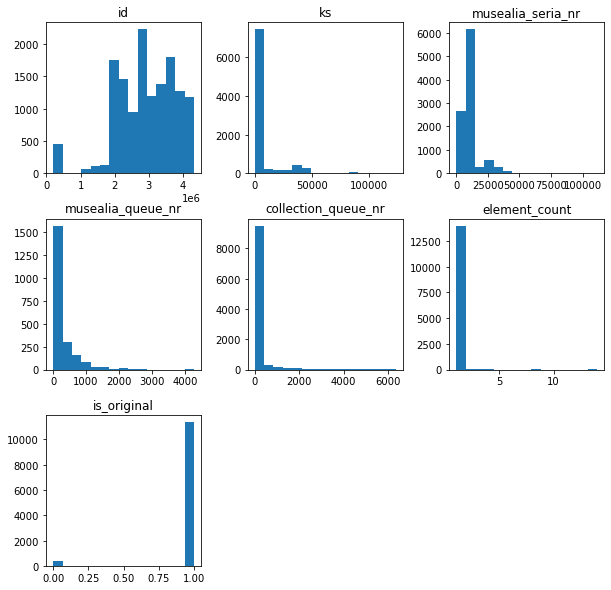

In [10]:
#visualiseerime iga tunnuse histogrammina
df.hist(figsize=(10,10), bins=15, grid=False);

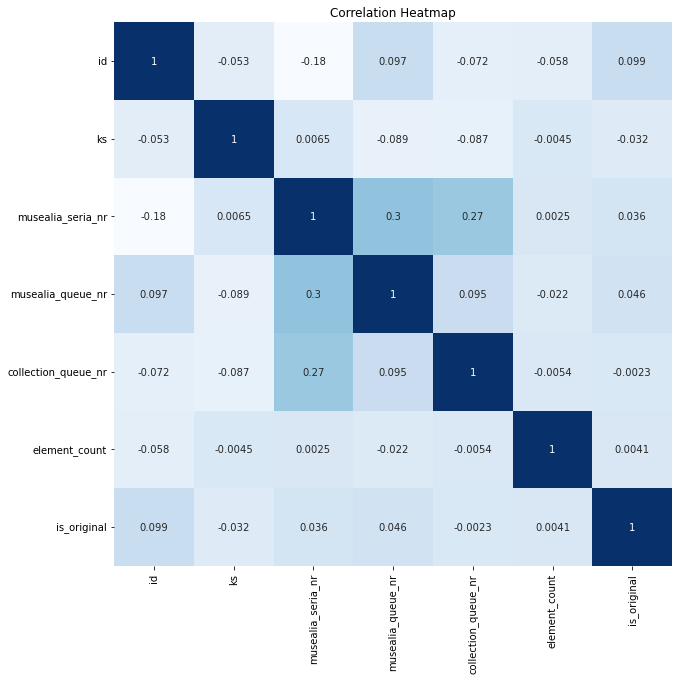

In [11]:
#Visualiseerimine tunnustevahelist korrelatsiooni
plt.figure(figsize = (10,10))
plt.title("Correlation Heatmap")
sns.heatmap(df.corr(), annot=True, cmap="Blues", cbar=False);

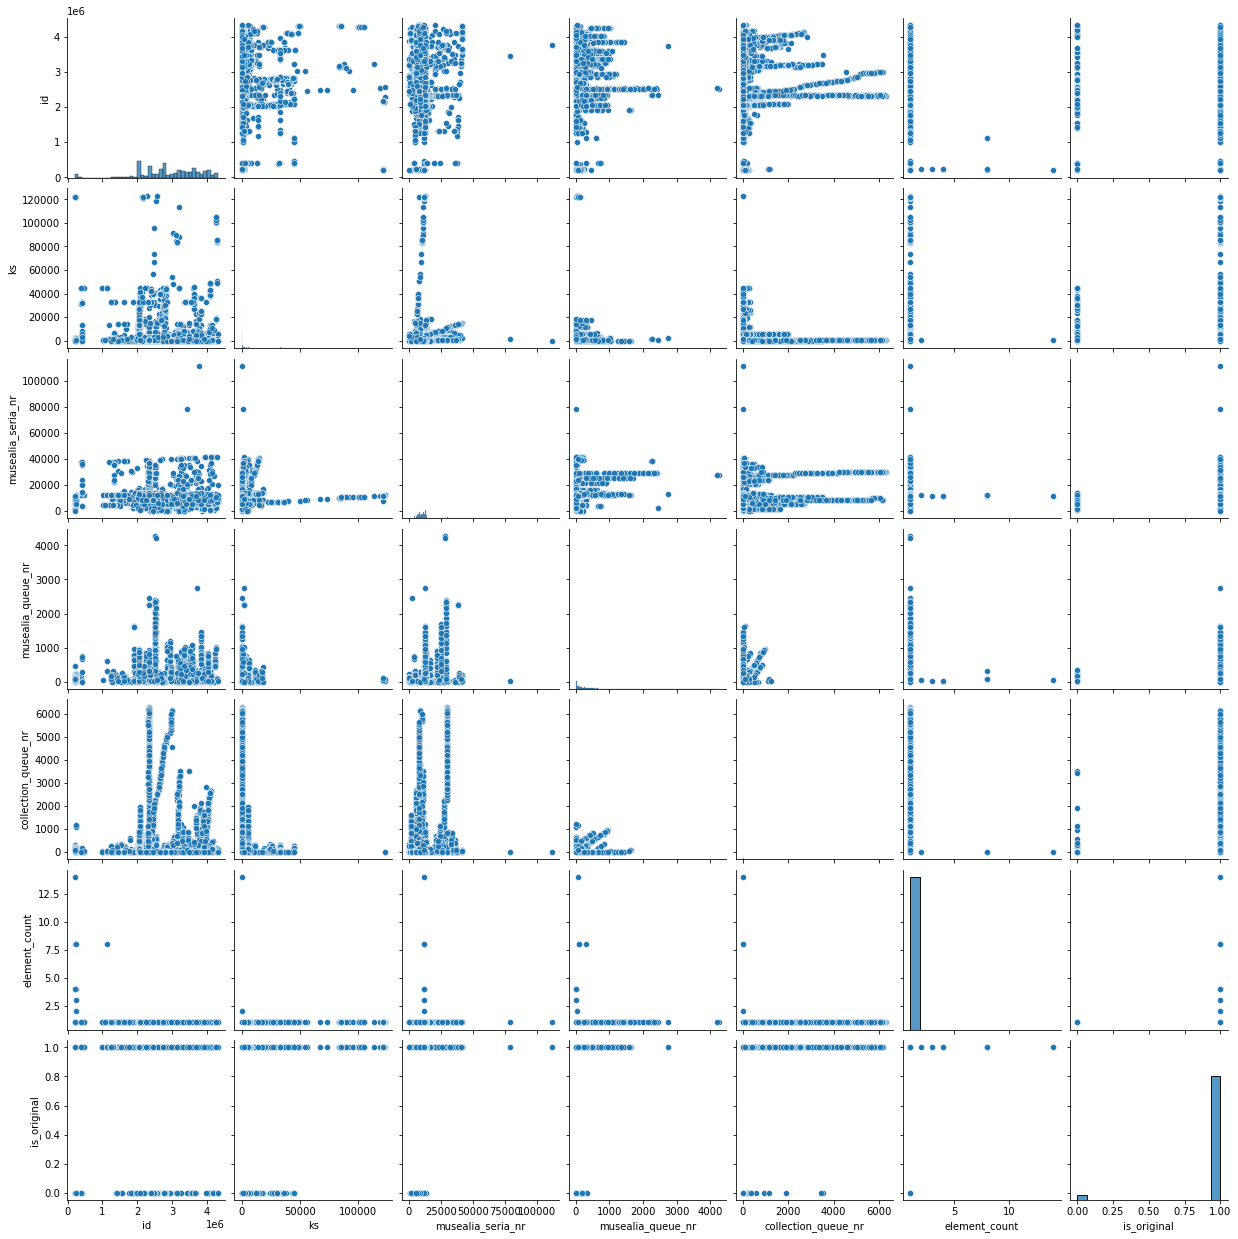

In [12]:
#Teeme täpsema joonise, visualiseerides seosesid paarikaupa
sns.pairplot(df);

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14000 entries, 0 to 13999
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        14000 non-null  int64  
 1   full_nr                   9012 non-null   object 
 2   name                      9012 non-null   object 
 3   ks                        8816 non-null   float64
 4   material                  9012 non-null   object 
 5   commentary                440 non-null    object 
 6   event_type                9302 non-null   object 
 7   location                  1239 non-null   object 
 8   start                     5920 non-null   object 
 9   end                       1247 non-null   object 
 10  before_Christ             5435 non-null   object 
 11  country_and_unit          9302 non-null   object 
 12  participants_role         6234 non-null   object 
 13  participant               6234 non-null   object 
 14  parish

In [14]:
df.describe()

,id,ks,musealia_seria_nr,musealia_queue_nr,collection_queue_nr,element_count,is_original
count,1.400000e+04,8816.000000,10010.000000,2209.000000,10440.000000,14000.000000,11779.000000
mean,2.923072e+06,6441.173888,11216.157343,273.129018,210.702969,1.003071,0.965362
std,8.626119e+05,15473.738824,6850.283512,398.997111,747.038120,0.155585,0.182869
min,1.956300e+05,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,2.328927e+06,53.000000,7315.000000,25.000000,1.000000,1.000000,1.000000
50%,2.870586e+06,416.000000,9951.500000,122.000000,2.000000,1.000000,1.000000
75%,3.620546e+06,3517.000000,12582.000000,329.000000,52.000000,1.000000,1.000000
max,4.322668e+06,123130.000000,111380.000000,4268.000000,6320.000000,14.000000,1.000000


In [15]:
import numpy as np
from warnings import filterwarnings
from collections import Counter
import plotly.express as px
import pandas as pd
import numpy as np
import re
import missingno as msno
from functools import partial
import seaborn as sns

colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_green = ['#01411C','#4B6F44','#4F7942','#74C365','#D0F0C0']

In [16]:
from matplotlib import cm

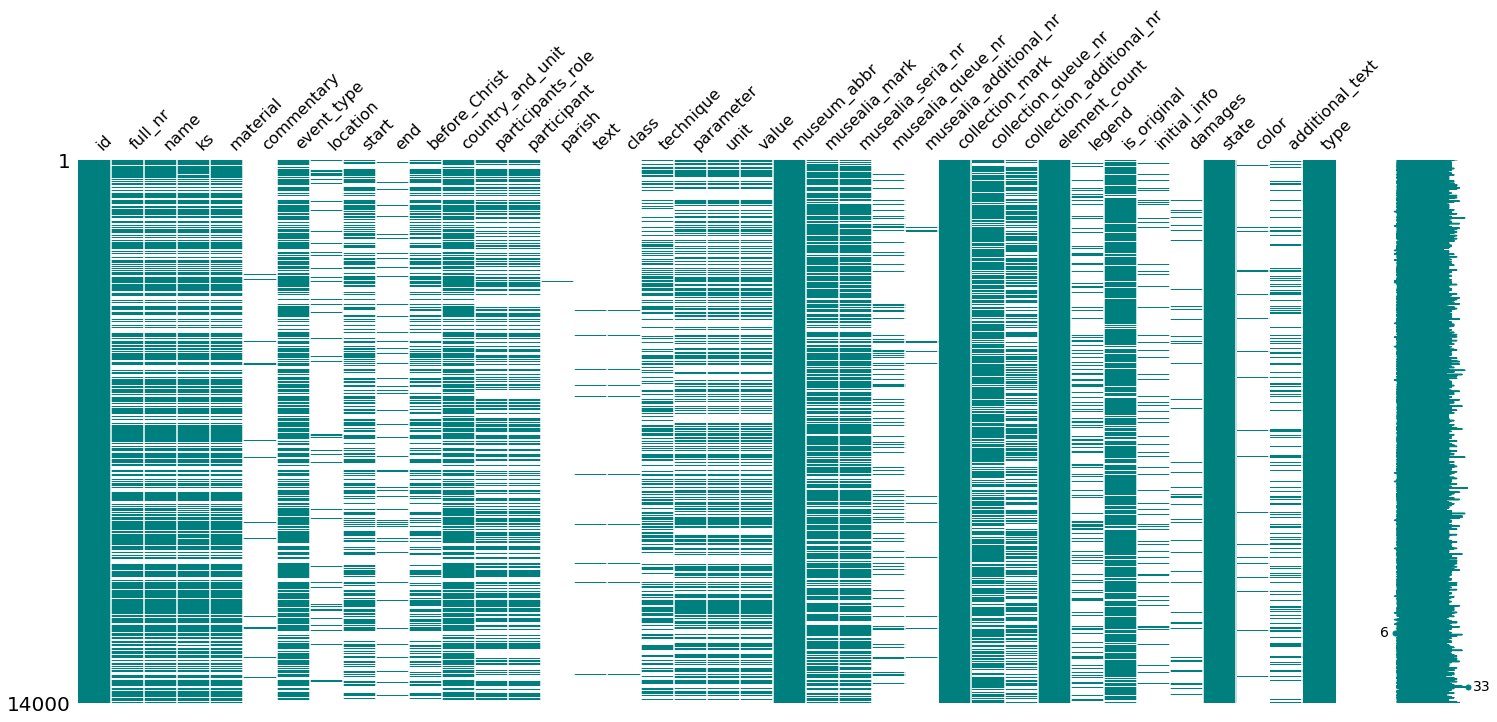

In [17]:
fig = msno.matrix(df,color=(0,0.5,0.5))

In [18]:
df.isnull().sum()

id                              0
full_nr                      4988
name                         4988
ks                           5184
material                     4988
commentary                  13560
event_type                   4698
location                    12761
start                        8080
end                         12753
before_Christ                8565
country_and_unit             4698
participants_role            7766
participant                  7766
parish                      13986
text                        13771
class                       13771
technique                    8309
parameter                    7429
unit                         7429
value                        7429
museum_abbr                     2
musealia_mark                3644
musealia_seria_nr            3990
musealia_queue_nr           11791
musealia_additional_nr      13517
collection_mark                 2
collection_queue_nr          3560
collection_additional_nr     6494
element_count 

In [19]:
print(f'Before dropping missing values, we have {df.shape[0]} instances')

df_dropped = df.dropna()
print(f'After dropping missing values, we have {df_dropped.shape[0]} instances')

# to see how mnay instances we have lost
print(f'We have lost {df.shape[0]-df_dropped.shape[0]} instances, which means {round((df.shape[0]-df_dropped.shape[0])/ (float(df.shape[0])),2)*100}% data we have lost')

Before dropping missing values, we have 14000 instances
After dropping missing values, we have 0 instances
We have lost 14000 instances, which means 100.0% data we have lost


In [20]:
print(df.dtypes)
df.isnull().sum()

id                            int64
full_nr                      object
name                         object
ks                          float64
material                     object
commentary                   object
event_type                   object
location                     object
start                        object
end                          object
before_Christ                object
country_and_unit             object
participants_role            object
participant                  object
parish                       object
text                         object
class                        object
technique                    object
parameter                    object
unit                         object
value                        object
museum_abbr                  object
musealia_mark                object
musealia_seria_nr           float64
musealia_queue_nr           float64
musealia_additional_nr       object
collection_mark              object
collection_queue_nr         

id                              0
full_nr                      4988
name                         4988
ks                           5184
material                     4988
commentary                  13560
event_type                   4698
location                    12761
start                        8080
end                         12753
before_Christ                8565
country_and_unit             4698
participants_role            7766
participant                  7766
parish                      13986
text                        13771
class                       13771
technique                    8309
parameter                    7429
unit                         7429
value                        7429
museum_abbr                     2
musealia_mark                3644
musealia_seria_nr            3990
musealia_queue_nr           11791
musealia_additional_nr      13517
collection_mark                 2
collection_queue_nr          3560
collection_additional_nr     6494
element_count 

In [21]:
# Deleting any columns that wouldn't make sense for detecting type

training = df.drop(columns=["full_nr","state","ks","start", "end", "before_Christ","participants_role","participant","parish","value","museum_abbr","musealia_mark","musealia_seria_nr","musealia_queue_nr","musealia_additional_nr","collection_mark","collection_queue_nr","collection_additional_nr","element_count","is_original"])
testing = datatest.drop(columns=["full_nr","state","ks","start", "end", "before_Christ","participants_role","participant","parish","value","museum_abbr","musealia_mark","musealia_seria_nr","musealia_queue_nr","musealia_additional_nr","collection_mark","collection_queue_nr","collection_additional_nr","element_count","is_original"])


In [22]:
# Change everything but the id column to a string type

columns = training.columns.values.tolist()[1:]
for col in columns:
  training[col] = training[col].astype("string")

columns2 = testing.columns.values.tolist()[1:]
for col in columns2:
  testing[col] = testing[col].astype("string")

In [23]:
# Encoding the data for use in algorithms

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown="ignore", categories="auto")
# Encoder for training data

training = training.drop(columns=["type"]).fillna("")
tr_encoder = ohe.fit_transform(training)

# Encoder for testing data
testing = testing.fillna("")
te_encoder = ohe.transform(testing)

In [24]:
# !!! Cell for testing the accuracy of algorithm using the given training data

# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from numpy import array

X = tr_encoder
y = df.iloc[:,-1].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=68)

# Train a decision tree classifier on the typed data
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Use the trained classifier to make predictions on the typed test data
y_pred = clf.predict(X_test)
print(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("")
print("Accuracy: {:.2f}".format(accuracy))

['pitser/templijäljend' 'foto' 'kava' ... 'fotonegatiiv' 'noodid' 'foto']

Accuracy: 0.77


In [25]:
# !!! Actual Decision Tree training, using the whole training data to train the algorithm

# Import the DecisionTreeClassifier class
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from numpy import array

# Training and testing data
X_train2 = tr_encoder
y_train2 = df.iloc[:,-1].values

X_test2 = te_encoder

# Train a decision tree classifier on the typed data
clf2 = DecisionTreeClassifier()
clf2.fit(X_train2, y_train2)

# Use the trained classifier to make predictions on the typed test data
y_pred2 = clf2.predict(X_test2)

In [26]:
# Showing the prediction results

d = {"id" : testing["id"].values.tolist(), "type" : y_pred2}
test = pd.DataFrame(data=d)
test

,id,type
0,2652198,foto
1,3851731,paber
2,1211338,kleit
3,231244,silt/märk
4,2523607,münt
...,...,...
5995,3035795,foto
5996,2765287,plakat
5997,2416520,raamat
5998,2327407,arheoloogiline leid
